# Задание, оцениваемое сокурсниками: Анализ данных в задаче кредитного скоринга

## Инструкции

Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

* LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)
* SEX: пол клиента (1 = мужской, 2 = женский )
* EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
* MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).
* AGE: возраст в годах
* PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
* BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь
* PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре
* default - индикатор невозврата денежных средств

## Задание

1. Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

2. Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

3. Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

4. Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

5. Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

### Данные

credit_card_default_analysis.csv


## Review criteria

1. Выполнение каждого пункта задания должно начинаться с графика с данными, которые вы собираетесь анализировать. Еще лучше, если вы разложите графики анализируемого фактора по переменной (default), на которую хотите изучить влияние этого фактора, и проинтерпретируете отличия в полученных распределениях.
2. При использовании статистических критериев необходимо убедиться в том, что условия их применимости выполняются. Например, если вы видите, что данные бинарные, то не нужно применять критерий Стьюдента.
3. При каждом использовании любого критерия необходимо указать, какая проверяется гипотеза, против какой альтернативы, чему равен достигаемый уровень значимости, принимается или отвергается нулевая гипотеза на уровне значимости 0.05. Если задача позволяет, нужно оценить размер эффекта и предположить, имеет ли этот результат практическую значимость.
4. Выполненное задание необходимо представить в ipython-ноутбука.


In [1]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
#from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt
import itertools

from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import *

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv("credit_card_default_analysis.csv", sep=",")

In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
data.shape

(30000, 25)

## Task 1.
Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [6]:
data.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [7]:
data01 = data[['LIMIT_BAL','default']]

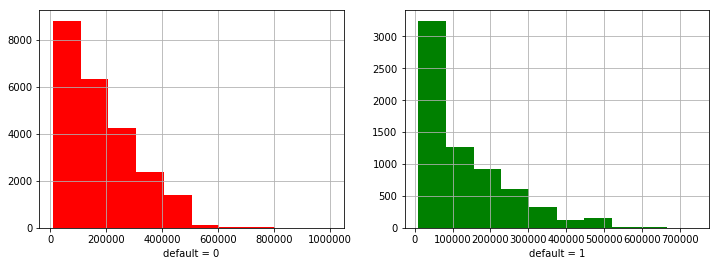

In [8]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(data01['LIMIT_BAL'][data01['default'] == 0], color = 'r')
pylab.xlabel('default = 0')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(data01['LIMIT_BAL'][data01['default'] == 1], color = 'g')
pylab.xlabel('default = 1')

pylab.show()

## Bootstrap

In [9]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

## Интервальная оценка медианы

In [10]:
limitBal0 = data01[data01.default == 0].LIMIT_BAL.values
limitBal1 = data01[data01.default == 1].LIMIT_BAL.values

In [11]:
np.random.seed(0)

limitBal0_median_scores = list(map(np.median, get_bootstrap_samples(limitBal0,1000)))
limitBal1_median_scores = list(map(np.median, get_bootstrap_samples(limitBal1, 1000)))

print("95% confidence interval for the credit limit default = 0:",  stat_intervals(limitBal0_median_scores, 0.05))
print("95% confidence interval for the credit limit default = 1:",  stat_intervals(limitBal1_median_scores, 0.05))

95% confidence interval for the credit limit default = 0: [ 150000.  150000.]
95% confidence interval for the credit limit default = 1: [ 80000.  90000.]


**Медианные значения не равны!**

**Точечная оценка разности медиан**

In [12]:
print("difference between medians:", np.median(limitBal0) - np.median(limitBal1))

difference between medians: 60000.0


**Интервальная оценка разности медиан**

In [13]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(limitBal1_median_scores, limitBal0_median_scores)))
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [ 60000.  70000.]


In [14]:
sc.stats.mannwhitneyu(limitBal0, limitBal1)

MannwhitneyuResult(statistic=59257217.5, pvalue=6.1277429091116516e-190)

### Проверим гипотезу о равенстве распределений с помощью перестановочного критерия

#### Перестановочный критерий

$H_0: F_{X_1}(x) = F_{X_2}(x)$


$H_1: F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [15]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [16]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [17]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

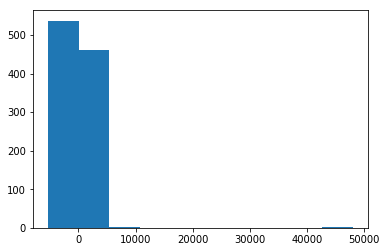

In [18]:
pylab.hist(permutation_zero_dist_ind(limitBal0, limitBal1, max_combinations = 1000))
pylab.show()

In [19]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [20]:
print("p-value: %f" % permutation_test(limitBal0, limitBal1, max_permutations = 10000))

p-value: 0.000100


**Гипотеза о равенстве средних отвергается против 2-х сторонней альтернативы на уровне 0.05!**

**Разница в размерах кредитов практически значима!**

## Task 2.
Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

In [21]:
print(data[data['default'] == 0].SEX.value_counts())
print(data[data['default'] == 1].SEX.value_counts())

2    14349
1     9015
Name: SEX, dtype: int64
2    3763
1    2873
Name: SEX, dtype: int64


In [22]:
male = data[data['SEX']==1].default
female = data[data['SEX']==2].default

In [23]:
good = data[data['default'] == 0].SEX
bad = data[data['default'] == 1].SEX

***Визуализация данных***

In [25]:
good_men = (good==1)
good_women = (good==2)
bad_men = (bad==1)
bad_women = (bad==2)

In [29]:
dfGender = pd.DataFrame([[sum(good_men), sum(bad_men), sum(good_women), sum(bad_women)]], 
                      columns = ["good_men", "bad_men", "good_women", "bad_women"])
dfGender

,good_men,bad_men,good_women,bad_women
0,9015,2873,14349,3763


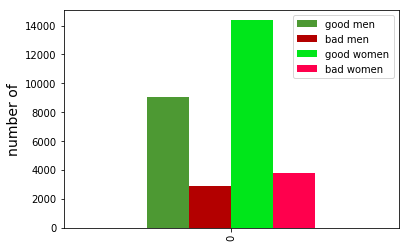

In [30]:
dfGender.plot.bar(color = ((0.3,0.6,0.2), (0.7,0.0,0.0), (0.0,0.9,0.1), (1.,0.0,0.3)))
plt.ylabel('number of', fontsize=14)
pylab.legend(["good men", 'bad men', 'good women', 'bad women'])

pylab.show()

Оценим процент женщин среди вернувших кредит и должников. Построим доверительные интервалы для доли методом Уилсона. Они не пересекаются:

In [31]:
from statsmodels.stats.proportion import proportion_confint

In [32]:
good_ci = proportion_confint(sum(good_women), len(good), method = 'wilson')
debtors_ci = proportion_confint(sum(bad_women), len(bad), method = 'wilson')
print(good_ci, debtors_ci)

(0.60788973403012403, 0.62037268419107494) (0.55510176302828174, 0.57893758196506595)


 ### Z-критерий для разности долей
 #### Доверительный интервал:

In [35]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = sc.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [36]:
print("95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(good-1, bad-1))

95% confidence interval for a difference between proportions: [0.033635, 0.060548]


#### Достигаемый уровень значимости для проверки гипотезы о равенстве гендерного состава:

In [41]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - sc.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return sc.stats.norm.cdf(z_stat)
    if alternative == 'greater':
        return 1 - sc.stats.norm.cdf(z_stat)

In [42]:
proportions_diff_z_test(proportions_diff_z_stat_ind(good-1,bad-1))

4.4728665216098307e-12

**Оценка связи пола и невозврата кредита с помощью коэффициента Мэтьюса**

In [43]:
def MCC(a,b,c,d):
    return ((a*d)-(b*c))/(np.sqrt((a+b)*(a+c)*(b+d)*(c+d)))

In [45]:
MCC(sum(good_woman),sum(good_man), sum(bad_woman), sum(bad_man))

0.039960577705441591

**В целом, среди не вернувших кредит, мужчин примерно на 3% больше.**

## Task 3.
Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

In [47]:
data03 = data[['EDUCATION','default']]
data03.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Сравним реальные данные по каждому варианту образования со средним значением (нормируем на количество людей в каждой группе)

In [144]:
mean_deb = float(sum(data03.default))/len(data03.default)
de_viz = []
pred_list = []
debtor_list = []
general_list = []

for i in range (0,7):
    pred_list.append(len(data03.default[data03['EDUCATION'] == i])*mean_deb)
    debtor_list.append(sum(data03.default[data03['EDUCATION'] == i]))
    general_list.append(len(data03.default[data03['EDUCATION'] == i]))
    de_viz.append(float(sum(data03.default[data03['EDUCATION'] == i]))/len(data03.default[data03['EDUCATION'] == i]))

In [145]:
print("Debtor list: ", debtor_list)
print("Pred List  : ", pred_list)

Debtor list:  [0, 2036, 3330, 1237, 7, 18, 8]
Pred List  :  [3.0968, 2341.402, 3103.436, 1087.6404, 27.2076, 61.936, 11.2812]


In [146]:
de_viz

[0.0,
 0.19234766178554558,
 0.23734853884533144,
 0.2515761643278422,
 0.056910569105691054,
 0.06428571428571428,
 0.1568627450980392]

In [134]:
z = pd.DataFrame(list(map(lambda x: float(x[0]-x[1])/x[2]*100, zip(debtor_list, pred_list, general_list))))

In [147]:
de_viz = pd.DataFrame([de_viz], 
         columns = [u"доктор", u"магистр", u"бакалавр", u"выпускник школы", u"начальное образование", u"прочее:", u"нет данных"])

In [148]:
de_viz.head()

,доктор,магистр,бакалавр,выпускник школы,начальное образование,прочее:,нет данных
0,0.0,0.192348,0.237349,0.251576,0.056911,0.064286,0.156863


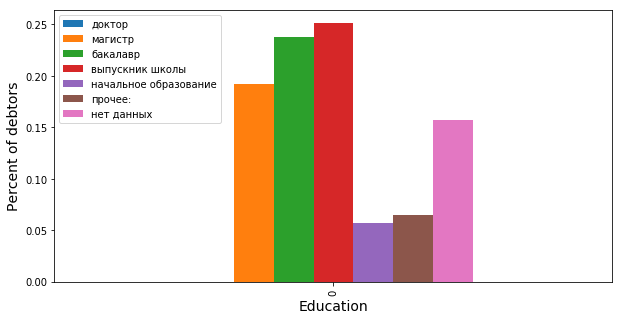

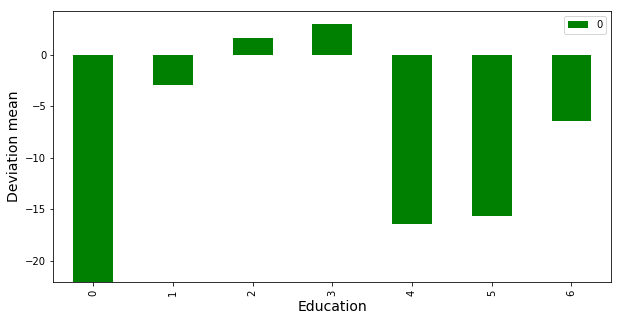

In [150]:
plt.figure(figsize(10,5))
de_viz.plot.bar()
plt.xlabel('Education', fontsize=14)
plt.ylabel('Percent of debtors', fontsize=14)

z.plot.bar(color='g')
plt.xlabel('Education', fontsize=14)
plt.ylabel('Deviation mean', fontsize=14)

pylab.show()

#### Для выявления зависимости невозврата кредита от образования подойдет коэффициент V Крамера:
Критерии применимости - размер выборки больше 40 и число ячеек таблицы сопряженности, в которых меньше <5 элементов - меньше 20%

In [152]:
confusion_matrix = pd.crosstab(data03.EDUCATION, data03.default)
confusion_matrix

default,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


In [155]:
def cramers_stat(confusion_matrix):
    chi2, p, dof, ex = sc.stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return (np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1))), p)

In [156]:
cramers_stat(confusion_matrix)

(0.073760097132521629, 1.2332626245415605e-32)

**Можно сказать, что чаще всего возвращают кредит доктора, или имеющие начальное образование. А выпускники школы чаще всего не возвращают кредит.**

## Task4.

Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

In [157]:
data04 = data[['SEX','MARRIAGE','default']]
data04.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [159]:
marr_yes = data04.default[data04['MARRIAGE'] == 1]
marr_no = data04.default[data04['MARRIAGE'] == 2]
marr_dis = data04.default[data04['MARRIAGE'] == 0]
marr_nd = data04.default[data04['MARRIAGE'] == 3]

In [160]:
mean_marr = float(sum(data04.default))/len(data04.default)
dm_viz = []
pred_m_list = []
debtor_m_list = []
general_m_list = []

for i in range (0,4):
    pred_m_list.append(len(data04.default[data04['MARRIAGE'] == i])*mean_deb)
    debtor_m_list.append(sum(data04.default[data04['MARRIAGE'] == i]))
    general_m_list.append(len(data04.default[data04['MARRIAGE'] == i]))
    dm_viz.append(float(sum(data04.default[data04['MARRIAGE'] == i]))/len(data04.default[data04['MARRIAGE'] == i]))

In [161]:
r = pd.DataFrame(list(map(lambda x: float(x[0]-x[1])/x[2]*100, zip(debtor_m_list, pred_m_list, general_m_list))))

In [162]:
dm_viz = pd.DataFrame(dm_viz)

In [163]:
dm_viz.head()

,0
0,0.092593
1,0.234717
2,0.209283
3,0.260062


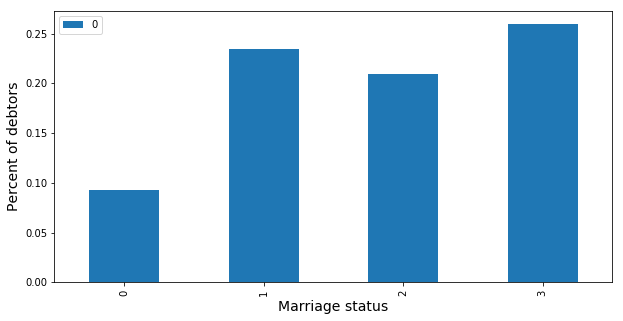

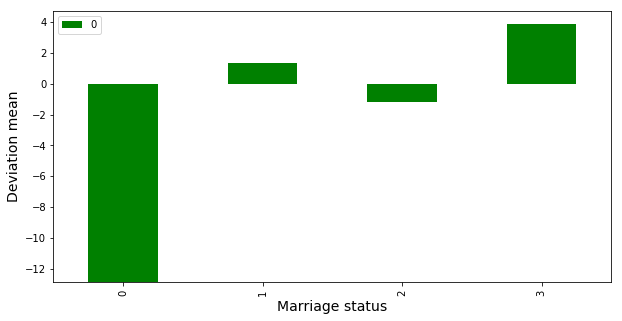

In [165]:
plt.figure(figsize(10,5))
dm_viz.plot.bar()
plt.xlabel('Marriage status', fontsize=14)
plt.ylabel('Percent of debtors', fontsize=14)

r.plot.bar(color='g')
plt.xlabel('Marriage status', fontsize=14)
plt.ylabel('Deviation mean', fontsize=14)

Поскольку людей с неопределенным семейным статусом немного, можем сравнить только группы женатых и холостых.

In [166]:
proportions_diff_confint_ind(marr_yes, marr_no)

(0.015928989280945341, 0.034938308247285874)

In [167]:
proportions_diff_z_test(proportions_diff_z_stat_ind(marr_yes, marr_no))

1.4485143440268189e-07

In [170]:
confusion_matrix = pd.crosstab(data04.MARRIAGE, data04.default)
confusion_matrix

default,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


In [171]:
cramers_stat(confusion_matrix)

(0.034478203662766466, 8.8258624575773752e-08)

Можно сделать вывод, что женатые хуже отдают кредиты. Лучшие заемщики - те, кто скрыл свой семейный статус.

## Task 5.
Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [173]:
data05 = data[['AGE','default']]

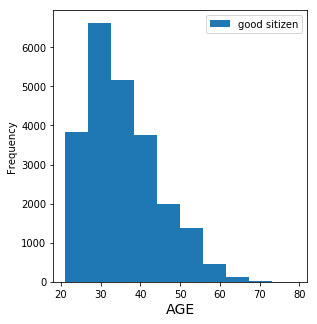

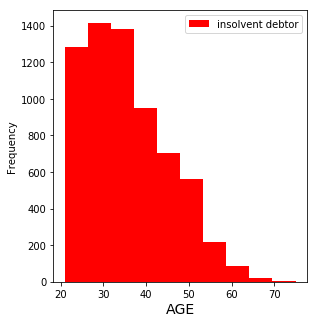

In [174]:
plt.figure(figsize(10,5))
plt.subplot(121)
data05['AGE'][data05['default'] == 0].plot.hist(label = "good sitizen")
plt.xlabel('AGE', fontsize=14)
pylab.legend()

plt.figure(figsize(10,5))
plt.subplot(122)
data05['AGE'][data05['default'] == 1].plot.hist(color = 'r',label = "insolvent debtor")
plt.xlabel('AGE', fontsize=14)
pylab.legend()

pylab.show()

In [175]:
good_limit_age = data05[data05.default == 0].AGE.values
debtor_limit_age = data05[data05.default == 1].AGE.values
np.random.seed(0)

good_median_scores = list(map(np.median, get_bootstrap_samples(good_limit_age, 5000)))
debtor_median_scores = list(map(np.median, get_bootstrap_samples(debtor_limit_age, 5000)))

In [176]:
print("95% confidence interval for the GOOD SITIZEN median AGE:",  stat_intervals(good_median_scores, 0.05))
print("95% confidence interval for the INSILVENT DEBTOR median AGE:",  stat_intervals(debtor_median_scores, 0.05))

95% confidence interval for the GOOD SITIZEN median AGE: [ 34.  34.]
95% confidence interval for the INSILVENT DEBTOR median AGE: [ 34.  35.]


In [177]:
# Точечная оценка разности медиан 
print(np.median(good_limit_age) - np.median(debtor_limit_age))

0.0


In [178]:
# Интервальная оценка разности медиан
delta_median_scores = list(map(lambda x: x[0] - x[1], zip(good_median_scores, debtor_median_scores)))
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [-1.  0.]


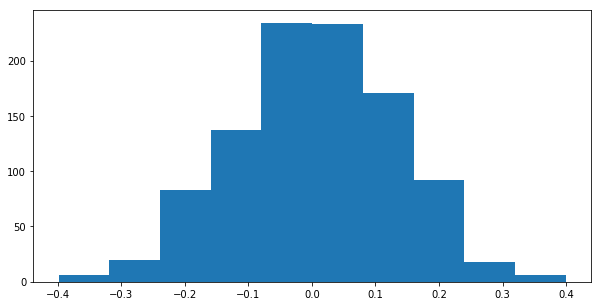

In [179]:
pylab.hist(permutation_zero_dist_ind(debtor_limit_age, good_limit_age, max_combinations = 1000))
pylab.show()

In [180]:
print("p-value: %f" % permutation_test(debtor_limit_age, good_limit_age, max_permutations = 10000))

p-value: 0.017600


**Нулевая гипотеза о равенстве средних отвергается против 2-х сторонней альтернативы на уровне 0.05.**